<a href="https://colab.research.google.com/github/jfelipeslg/AnaliseDados_Eleicoes2022/blob/main/IntencoesVotoEleicoes2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install basedosdados

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import basedosdados as bd
import pandas as pd

In [ ]:
# https://basedosdados.org/dataset/br-poder360-pesquisas?bdm_table=microdados
df = bd.read_table(dataset_id='br_poder360_pesquisas',
table_id='microdados',
billing_project_id="fine-booking-365316")

pd.options.plotting.backend = "plotly"

Downloading: 100%|██████████| 157322/157322 [00:29<00:00, 5264.57rows/s]


In [ ]:
df.head()

,id_pesquisa,ano,sigla_uf,nome_municipio,cargo,data,data_referencia,instituto,contratante,orgao_registro,...,tipo,turno,tipo_voto,id_cenario,descricao_cenario,id_candidato_poder360,nome_candidato,sigla_partido,condicao,percentual
0,8023,2006,None,None,presidente,2006-09-19,18-19.set.06,Datafolha,None,None,...,estimulada,1,votos totais,20265,cenário único - estimulado,97,Ana Maria Rangel,PRP,0,0.0
1,8023,2006,None,None,presidente,2006-09-19,18-19.set.06,Datafolha,None,None,...,estimulada,1,votos totais,20265,cenário único - estimulado,973,Lula,PT,0,50.0
2,8023,2006,None,None,presidente,2006-09-19,18-19.set.06,Datafolha,None,None,...,estimulada,1,votos totais,20265,cenário único - estimulado,575,Alckmin,PSDB,0,29.0
3,8023,2006,None,None,presidente,2006-09-19,18-19.set.06,Datafolha,None,None,...,estimulada,1,votos totais,20265,cenário único - estimulado,327,Cristovam Buarque,PDT,0,2.0
4,8023,2006,None,None,presidente,2006-09-19,18-19.set.06,Datafolha,None,None,...,estimulada,1,votos totais,20265,cenário único - estimulado,645,Heloísa Helena,Psol,0,9.0


In [ ]:
paraiba_governador = df[(df.ano == 2022) &
                        (df.sigla_uf == 'PB') &
                        (df.instituto == 'Ipec') &
                        (df.tipo == 'estimulada') &
                        (df.turno == 1) &
                        (df.descricao_cenario.str.contains('cenário 1') == True) &
                        (df.cargo == 'governador')].sort_values(by='data')

paraiba_governador.plot(x='data', y='percentual', color='nome_candidato', title='Intenções de voto | Eleições 2022 - 1° Turno - Governador | Paraíba')

In [ ]:
paraiba_senador = df[(df.ano == 2022) &
                        (df.sigla_uf == 'PB') &
                        (df.instituto == 'Ipec') &
                        (df.tipo == 'estimulada') &
                        (df.turno == 1) &
                        (df.descricao_cenario.str.contains('cenário 1') == True) &
                        (df.cargo == 'senador')].sort_values(by='data')

paraiba_senador.plot(x='data', y='percentual', color='nome_candidato', title='Intenções de voto | Eleições 2022 - Senador | Paraíba')

In [ ]:
paraiba_presidente = df[(df.ano == 2022) &
                        (df.sigla_uf == 'PB') &
                        (df.instituto == 'Ipec') &
                        (df.tipo == 'estimulada') &
                        (df.turno == 1) &
                        (df.descricao_cenario.str.contains('cenário 1') == True) &
                        ((df.nome_candidato == 'Lula') | (df.nome_candidato == 'Bolsonaro') | (df.nome_candidato == 'Simone Tebet') | (df.nome_candidato == 'Ciro')) &
                        (df.cargo == 'presidente')].sort_values(by='data')

paraiba_presidente.plot(x='data', y='percentual', color='nome_candidato', title='Intenções de voto | Eleições 2022 - 1° Turno - Presidente | Paraíba')

In [ ]:
brasil_presidente = df[(df.ano == 2022) &
                        (df.sigla_uf.isnull()) &
                        (df.instituto == 'Datafolha') &
                        (df.tipo == 'estimulada') &
                        (df.turno == 1) &
                        (df.descricao_cenario.str.contains('cenário 1') == True) &
                        ((df.nome_candidato == 'Lula') | (df.nome_candidato == 'Bolsonaro') | (df.nome_candidato == 'Simone Tebet') | (df.nome_candidato == 'Ciro')) &
                        (df.cargo == 'presidente')].sort_values(by='data')

brasil_presidente.plot(x='data', y='percentual', color='nome_candidato', title='Intenções de voto | Eleições 2022 - 1° Turno - Presidente | Brasil')

### Votos da Eleições 2022 - 1° Turno

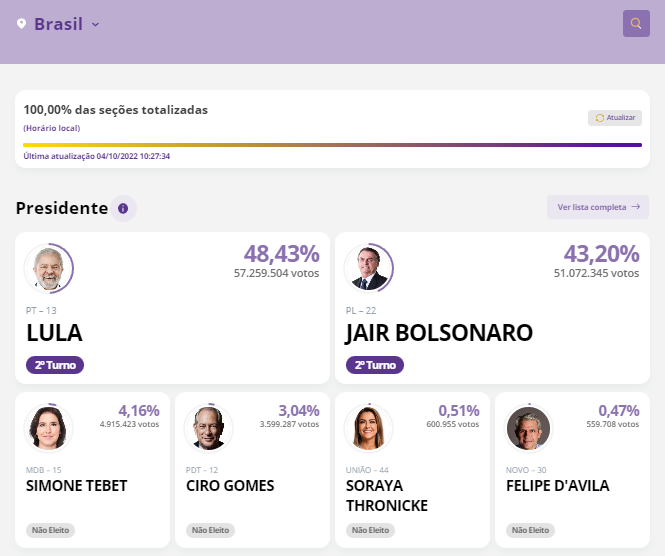

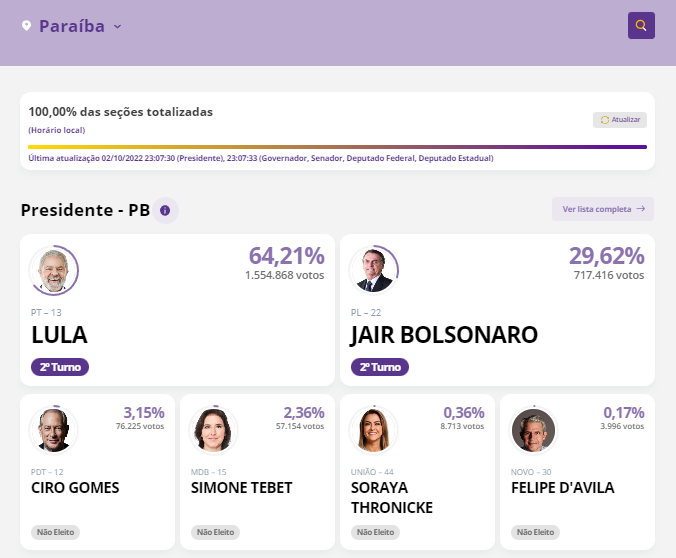

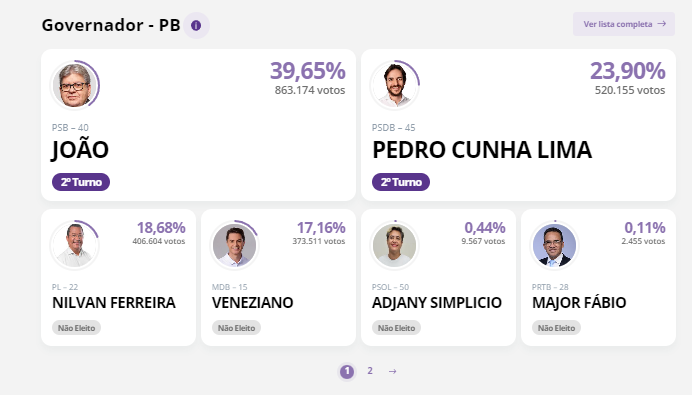

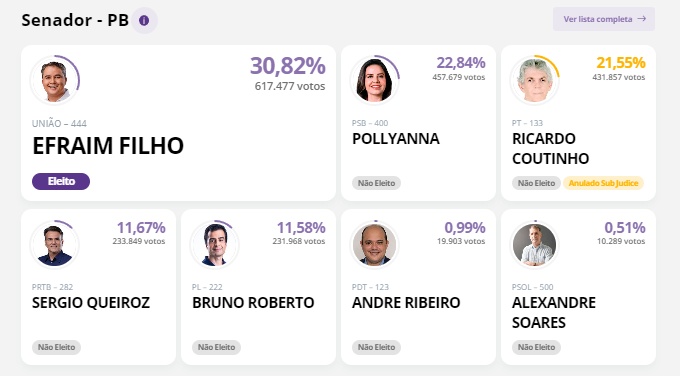